# 使用opencv读取并显示图片

示例图片如下(1.jpg)：

![sample_img](1.jpg)

In [39]:
import cv2
import random
import numpy as np

In [5]:
img = cv2.imread('1.jpg') #读取原图
img_gray = cv2.imread('1.jpg', 0) #读取灰度图

In [30]:
# 灰度图和彩色图分别读取为二维和三维numpy数组
print(type(img)) 
print(img_gray) 

<class 'numpy.ndarray'>
[[  6   6   6 ...,   6   6   6]
 [  6   6   6 ...,   6   6   6]
 [  6   6   6 ...,   6   6   6]
 ..., 
 [102  85  87 ...,  90  90  90]
 [104  86  86 ...,  90  90  90]
 [105  86  85 ...,  90  90  90]]


In [7]:
# 数组大小及数据格式
print('shape of img is {}'.format(img.shape))    # h, w, c
print('shape of img_gray is {}'.format(img_gray.shape))
print(img.dtype)  # show image data type

shape of img is (480, 640, 3)
shape of img_gray is (480, 640)
uint8


In [31]:
# 显示图片
cv2.imshow('img_gray', img_gray)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [25]:
# 保存图片
cv2.imwrite('image_gray.jpg', img_gray)

True

In [29]:
# image crop
img_crop = img[:200, :400]
cv2.imshow('img_crop', img_crop)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [32]:
# channel split
B, G, R = cv2.split(img)  # opencv读取彩色图片为BGR格式
cv2.imshow('B', B)
cv2.imshow('G', G)
cv2.imshow('R', R)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 改变图片颜色

In [35]:
# change color
def random_light_color(img):
    # brightness
    B, G, R = cv2.split(img)
    
    for C in [B,G,R]:
        rand_shift = random.randint(-50, 50)
        if rand_shift == 0:
            pass
        elif rand_shift > 0:
            lim = 255 - rand_shift
            C[C > lim] = 255
            C[C <= lim] = (rand_shift + C[C <= lim]).astype(img.dtype)
        elif rand_shift < 0:
            lim = 0 - rand_shift
            C[C < lim] = 0
            C[C >= lim] = (rand_shift + C[C >= lim]).astype(img.dtype)
    img_merge = cv2.merge((B, G, R))
    return img_merge

In [42]:
# change color 2 在YUV空间改变图片颜色
def random_color_yuv(img):
    img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV) # 改变颜色空间 从BGR到YUV
    y,u,v = cv2.split(img_yuv)

    for c in [y,u,v]:
        rand_shift = random.randint(-50, 50)
        c[c > 255 - rand_shift] = 255 - rand_shift
        c[c < -rand_shift] = -rand_shift
        c[:] = c[:] + rand_shift

    img_merge = cv2.merge((y,u,v))
    img_bgr = cv2.cvtColor(img_merge, cv2.COLOR_YUV2BGR)
    return img_bgr

In [38]:
img_random_color = random_light_color(img)
cv2.imshow('img_ori', img)
cv2.imshow('img_random_color', img_random_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [45]:
img_random_color = random_color_yuv(img)
cv2.imshow('img_ori', img)
cv2.imshow('img_random_color', img_random_color)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 伽马校正

In [46]:
# 可改变图像对比度
# gamma correction
def adjust_gamma(img, gamma=1.0):
    invGamma = 1.0/gamma
    table = [ ((i / 255.0) ** invGamma) * 255 for i in range(256)]  # 构建映射表，以提升计算速度
    table = np.array(table, dtype = 'uint8')
    return cv2.LUT(img, table)

In [47]:
img_brighter = adjust_gamma(img, 2)  # 通过改变gamma值提升亮度
cv2.imshow('img_ori', img)
cv2.imshow('img_brighter', img_brighter)
cv2.waitKey(0)
cv2.destroyAllWindows()

# 图像直方图及直方图均衡化

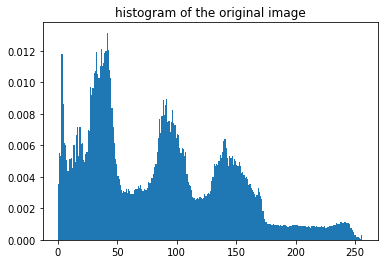

In [66]:
# histogram 图像灰度值的分布
from matplotlib import pyplot as plt
plt.figure(1)
plt.title('histogram of the original image')
plt.hist(img.flatten(), bins=256, range = [0,256], normed=1)
plt.show()

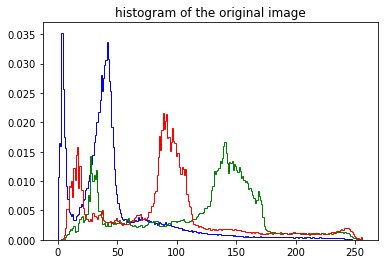

In [67]:
# 三个通道的直方图
plt.figure(1)
plt.hist(img[:,:,0].flatten(), bins=256, range = [0,256], normed=1, color='b', histtype  = 'step')
plt.hist(img[:,:,1].flatten(), bins=256, range = [0,256], normed=1, color='g', histtype  = 'step')
plt.hist(img[:,:,2].flatten(), bins=256, range = [0,256], normed=1, color='r', histtype  = 'step')
plt.title('histogram of the original image')
plt.show()

BGR三个通道分别进行直方图均衡化

In [69]:
# equalize the histogram of the b, g, r channel respectively
b, g, r = cv2.split(img)
bh = cv2.equalizeHist(b)
gh = cv2.equalizeHist(g)
rh = cv2.equalizeHist(r)
img_equHist = cv2.merge((bh, gh, rh))

cv2.imshow('img_ori', img)
cv2.imshow('Histogram equalized', img_equHist)
cv2.waitKey(0)
cv2.destroyAllWindows()

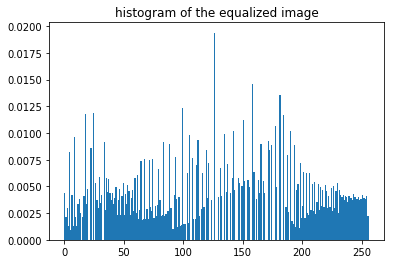

In [71]:
plt.figure(1)
plt.title('histogram of the equalized image')
plt.hist(img_equHist.flatten(), bins=256, range = [0,256], normed=1)
plt.show()

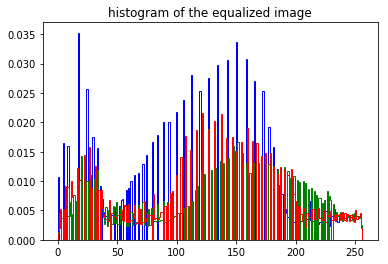

In [75]:
plt.figure(1)
plt.title('histogram of the equalized image')
plt.hist(img_equHist[:,:,0].flatten(), bins=256, range = [0,256], normed=1, color='b', histtype  = 'step')
plt.hist(img_equHist[:,:,1].flatten(), bins=256, range = [0,256], normed=1, color='g', histtype  = 'step')
plt.hist(img_equHist[:,:,2].flatten(), bins=256, range = [0,256], normed=1, color='r', histtype  = 'step')
plt.show()

在YUV空间进行直方图均衡化（Y通道代表灰度值）

In [76]:
# equalize the histogram of the Y channel, YUV format
img_yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0])
img_equHist = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2BGR)

cv2.imshow('img_ori', img)
cv2.imshow('Histogram equalized', img_equHist)
cv2.waitKey(0)
cv2.destroyAllWindows()

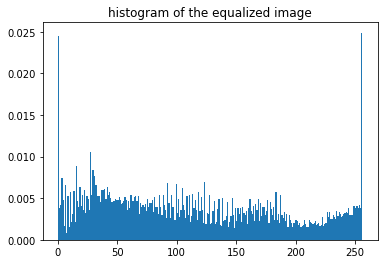

In [77]:
plt.figure(1)
plt.title('histogram of the equalized image')
plt.hist(img_equHist.flatten(), bins=256, range = [0,256], normed=1)
plt.show()

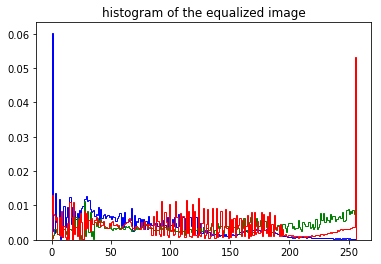

In [78]:
plt.figure(1)
plt.title('histogram of the equalized image')
plt.hist(img_equHist[:,:,0].flatten(), bins=256, range = [0,256], normed=1, color='b', histtype  = 'step')
plt.hist(img_equHist[:,:,1].flatten(), bins=256, range = [0,256], normed=1, color='g', histtype  = 'step')
plt.hist(img_equHist[:,:,2].flatten(), bins=256, range = [0,256], normed=1, color='r', histtype  = 'step')
plt.show()

# 图片变换： 仿射变换、投影变换

Similarity transform：scale + rotation + translation

In [83]:
M = cv2.getRotationMatrix2D((img.shape[1] / 2, img.shape[0] / 2), 30, 0.5) # center, angle, scale 计算旋转矩阵
img_rotate = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))
print(M)  # 前两列与旋转角度有关，最后一列与平移距离有关

[[   0.4330127     0.25        121.43593539]
 [  -0.25          0.4330127   216.07695155]]


In [84]:
M[0,2] = 0  # 改变平移距离
M[1,2] = 0
img_rotate2 = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

In [89]:
cv2.imshow('img_rotate', img_rotate)
cv2.imshow('img_rotate2', img_rotate2)
cv2.waitKey(0)
cv2.destroyAllWindows()

Affine Transform: 保持图片中的平行线但不保持直角，由不在同一条直线上的三个点可确定一个仿射变换

In [86]:
# Affine Transform
rows, cols, ch = img.shape
pts1 = np.float32([[0, 0], [cols - 1, 0], [0, rows - 1]])
pts2 = np.float32([[cols * 0.2, rows * 0.1], [cols * 0.9, rows * 0.2], [cols * 0.1, rows * 0.9]])
 
M = cv2.getAffineTransform(pts1, pts2)  # 计算变换矩阵
dst = cv2.warpAffine(img, M, (cols, rows))  # 得到变换后的图
print(M)

[[  7.01095462e-01  -1.33611691e-01   1.28000000e+02]
 [  7.51173709e-02   8.01670146e-01   4.80000000e+01]]


In [87]:
cv2.imshow('affine img', dst)
key = cv2.waitKey(0)
cv2.destroyAllWindows()

perspective transform: 只保持原图片中的直线，可由四个点（任意三个点不在同一条直线上）确定

In [90]:
# perspective transform
def random_warp(img):
    height, width, _ = img.shape

    # warp:
    random_margin = 60
    x1 = random.randint(-random_margin, random_margin)
    y1 = random.randint(-random_margin, random_margin)
    x2 = random.randint(width - random_margin - 1, width - 1)
    y2 = random.randint(-random_margin, random_margin)
    x3 = random.randint(width - random_margin - 1, width - 1)
    y3 = random.randint(height - random_margin - 1, height - 1)
    x4 = random.randint(-random_margin, random_margin)
    y4 = random.randint(height - random_margin - 1, height - 1)

    dx1 = random.randint(-random_margin, random_margin)
    dy1 = random.randint(-random_margin, random_margin)
    dx2 = random.randint(width - random_margin - 1, width - 1)
    dy2 = random.randint(-random_margin, random_margin)
    dx3 = random.randint(width - random_margin - 1, width - 1)
    dy3 = random.randint(height - random_margin - 1, height - 1)
    dx4 = random.randint(-random_margin, random_margin)
    dy4 = random.randint(height - random_margin - 1, height - 1)

    pts1 = np.float32([[x1, y1], [x2, y2], [x3, y3], [x4, y4]])
    pts2 = np.float32([[dx1, dy1], [dx2, dy2], [dx3, dy3], [dx4, dy4]])
    M_warp = cv2.getPerspectiveTransform(pts1, pts2)
    img_warp = cv2.warpPerspective(img, M_warp, (width, height))
    return M_warp, img_warp

In [91]:
M_warp, img_warp = random_warp(img)
print(M_warp)

[[  7.62255937e-01   1.78865842e-01  -5.35396902e+01]
 [ -1.35638289e-01   9.13814840e-01   4.75020243e+01]
 [ -5.38352558e-04   2.36142946e-04   1.00000000e+00]]


In [93]:
cv2.imshow('img_warp', img_warp)
key = cv2.waitKey(0)
cv2.destroyAllWindows()